# Lab 3 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

4 IR SI - Groupe A2
- Firmin Rousseau
- Anya Meetoo

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [1]:
from sklearn.model_selection import ParameterGrid
from sklearn import tree
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")


parameters = {
    'splitter': ['best'],
    'max_depth': [1,2,3,5,7,9,11,13,15],
    'min_samples_leaf': [1,2,3,4,5,6]
}
grid = ParameterGrid(parameters)
trees=[]
for params in grid:
    tree1 = tree.DecisionTreeClassifier(**params)
    
    trees.append(tree1)
print(len(trees))

54


Q2: Train a decision tree for each of the previous configurations on the full dataset

In [2]:
fit_trees=[]
for tr in trees:
    fit_trees.append(tr.fit(train_examples, train_labels)) # train the tree

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [3]:
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=parameters, cv=5)

grid_cv = grid_cv.fit(train_examples,train_labels)


clf=grid_cv.best_estimator_
a=grid_cv.best_params_

sc=clf.score(train_examples,train_labels)

print(sc*100)

67.6465010430495


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

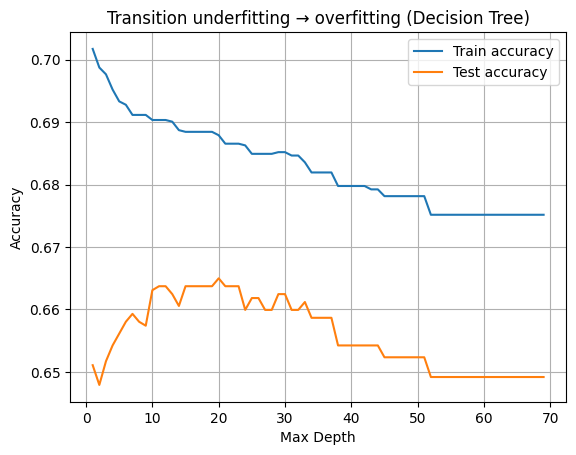

In [ ]:

from utils import load_from_csv
from sklearn.model_selection import ParameterGrid
from sklearn import tree

from sklearn.model_selection import train_test_split

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.3, random_state=42)

parameters = {
    'max_depth': [i for i in range(1,30)]
}
grid = ParameterGrid(parameters)
trees=[]
train_scores = []
test_scores = []
depths = []

for params in grid:
    clf = tree.DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    depths.append(params['max_depth'])
    
import matplotlib.pyplot as plt

plt.plot(depths, train_scores, label='Train accuracy')
plt.plot(depths, test_scores, label='Test accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Transition underfitting → overfitting (Decision Tree)')
plt.legend()
plt.grid()
plt.show()



 Construct the confusion matrix on a particular good configuration (after explaining your choice)Q5:

In [ ]:
import pandas as pd
from utils import load_from_csv
from sklearn import tree
from utils import ConfusionMatrix
# Charger
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

# Convertir en DataFrame pour accès par nom
train_df = pd.DataFrame(train_examples, columns=features)

# Split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_labels, test_size=0.3, random_state=42)

# Fit & predict
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Créer les masques
minority_mask = X_test['race_African-American'] == 1
majority_mask = X_test['race_Caucasian'] == 1

# Confusion matrix
cm = ConfusionMatrix(minority=minority_mask.to_numpy(), majority=majority_mask.to_numpy(),
                     label=y_pred, truth=y_test)
minority_matrix, majority_matrix = cm.get_matrix()

print("print(majority_matrix) : ",majority_matrix)
print(majority_matrix["TP"])

# Fonction pour convertir un dictionnaire de métriques en DataFrame
def metrics_to_df(minority_metrics, majority_metrics):
    df = pd.DataFrame({
        'Minority': minority_metrics,
        'Majority': majority_metrics
    })
    # Optionnel : arrondir à 4 décimales
    df = df.round(4)
    return df

df_metrics = metrics_to_df(minority_matrix, majority_matrix)
print(df_metrics)



print(majority_matrix) :  {'TP': 90, 'FP': 73, 'FN': 145, 'TN': 335, 'PPV': 0.5521472392638037, 'TPR': 0.3829787234042553, 'FDR': 0.44785276073619634, 'FPR': 0.17892156862745098, 'FOR': 0.3020833333333333, 'FNR': 0.6170212765957447, 'NPV': 0.6979166666666666, 'TNR': 0.821078431372549, 'PPR': 0.2534992223950233}
90
     Minority  Majority
TP   316.0000   90.0000
FP   185.0000   73.0000
FN   150.0000  145.0000
TN   288.0000  335.0000
PPV    0.6307    0.5521
TPR    0.6781    0.3830
FDR    0.3693    0.4479
FPR    0.3911    0.1789
FOR    0.3425    0.3021
FNR    0.3219    0.6170
NPV    0.6575    0.6979
TNR    0.6089    0.8211
PPR    0.5335    0.2535


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [ ]:
#FPR see above